In [ ]:
#Loan Status Classification 
# Kaggle data - https://www.kaggle.com/datasets/mirzahasnine/loan-data-set
#Shows label encoding techniques and model interpretation with shap

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading dataset
df = pd.read_csv(r"C:\Users\tijo.thomas\OneDrive - edelweisstokio.in\Desktop\Python\Classification\Loan Approval Classification\archive (2)\loan_train.csv")

In [4]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [5]:

# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 614 Columns: 12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Applicant_Income,614.0,5.403459e+05,6.109042e+05,15000.0,287750.0,381250.0,579500.0,8100000.0
Coapplicant_Income,614.0,1.621246e+05,2.926248e+05,0.0,0.0,118850.0,229725.0,4166700.0
Loan_Amount,614.0,1.414104e+07,8.815682e+06,0.0,9800000.0,12500000.0,16475000.0,70000000.0
Term,600.0,3.420000e+02,6.512041e+01,12.0,360.0,360.0,360.0,480.0
Credit_History,564.0,8.421986e-01,3.648783e-01,0.0,1.0,1.0,1.0,1.0


In [8]:
#Data Preprocessing
#Check the number of unique value of an object datatype
df.select_dtypes(include="object").nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Area             3
Status           2
dtype: int64

Exploratory Data Analysis

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [10]:
#Checking the missing values
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending = False)

Credit_History    8.143322
Self_Employed     5.211726
Dependents        2.442997
Term              2.280130
Gender            2.117264
Married           0.488599
dtype: float64

In [11]:
#Fill null values with 'Unknown'
df.fillna("Unknown", inplace = True)

check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending = False)


Series([], dtype: float64)

In [12]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                   object
Credit_History         object
Area                   object
Status                 object
dtype: object

In [16]:
df['Term'].unique()

array([360.0, 120.0, 240.0, 'Unknown', 180.0, 60.0, 300.0, 480.0, 36.0,
       84.0, 12.0], dtype=object)

Label Encoding for Object Datatypoe

In [18]:
#Loop over ach column in the dataframe where dtype is "object"
for col in df.select_dtypes(include=['object']).columns:

    #Print the column name and the unqiue values
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female' 'Unknown']
Married: ['No' 'Yes' 'Unknown']
Dependents: ['0' '1' '2' '3+' 'Unknown']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' 'Unknown']
Term: [360.0 120.0 240.0 'Unknown' 180.0 60.0 300.0 480.0 36.0 84.0 12.0]
Credit_History: [1.0 0.0 'Unknown']
Area: ['Urban' 'Rural' 'Semiurban']
Status: ['Y' 'N']


In [19]:
#Convert selected columns to string data type
df[['Term','Credit_History']] = df[['Term','Credit_History']].astype(str)

In [21]:
from sklearn import preprocessing

#Loop over each column in dataframe where dtype is 'Object"
for col in df.select_dtypes(include=['object']).columns:

    #Initialize a LabelEncoder object
    label_encoder =  preprocessing.LabelEncoder()

    #Fit the encode to the unique values in the column
    label_encoder.fit(df[col].unique())

    #Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    #Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Gender: [1 0 2]
Married: [0 2 1]
Dependents: [0 1 2 3 4]
Education: [0 1]
Self_Employed: [0 2 1]
Term: [ 6  1  3 10  2  8  4  7  5  9  0]
Credit_History: [1 0 2]
Area: [2 0 1]
Status: [1 0]


Checking for Class imbalance in dataset

1    422
0    192
Name: Status, dtype: int64

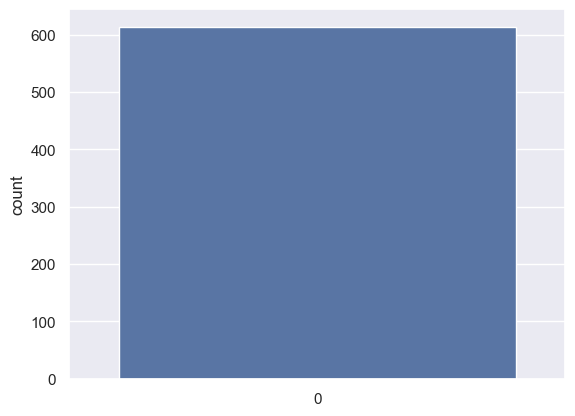

In [26]:
sns.countplot(df['Status'])
df['Status'].value_counts()

Oversampling minority class to balance the llabel

In [27]:
from sklearn.utils import resample
#Create two different dataframe of majority and minority class
df_majority = df[(df['Status']==1)]
df_minority = df[(df['Status']==0)]

#Upsampling Minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  #Sample with replacement
                                 n_samples= 422,  #to match majority class
                                 random_state = 0)  #REPRODUCE RESULTS

#cOMBINE majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

0    422
1    422
Name: Status, dtype: int64

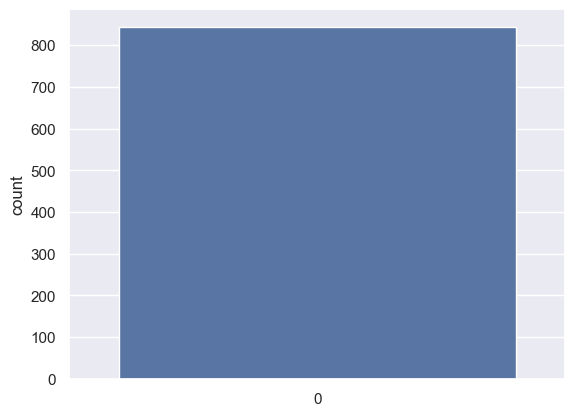

In [29]:
sns.countplot(df_upsampled['Status'])
df_upsampled['Status'].value_counts()

In [31]:
#Removing outlier using IQR because there are lot of extreme values
df_upsampled.shape

(844, 12)

In [36]:
#Specify the colymns to remove outliers from dataframe
column_names = ['Applicant_Income', 'Coapplicant_Income', 'Term']

#Remove outliers for each selected column using the IQR method
for column_name in column_names:
    Q1 = df_upsampled[column_name].quantile(0.25)
    Q3 = df_upsampled[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df_upsampled = df_upsampled[~(df_upsampled[column_name] < (Q1 - 1.5*IQR)) | (df_upsampled[column_name] < (Q1 + 1.5*IQR))]

df_upsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
554,1,2,0,0,0,359300,426600.0,13200000,2,0,0,0
148,0,0,0,0,0,1000000,166600.0,22500000,6,1,0,0
378,1,0,0,0,0,306900,0.0,7100000,7,1,2,0
202,1,2,3,1,0,399200,0.0,0,2,1,2,0
338,0,0,3,1,0,183000,0.0,0,6,0,2,0


In [37]:
df_upsampled.shape

(844, 12)

<AxesSubplot: >

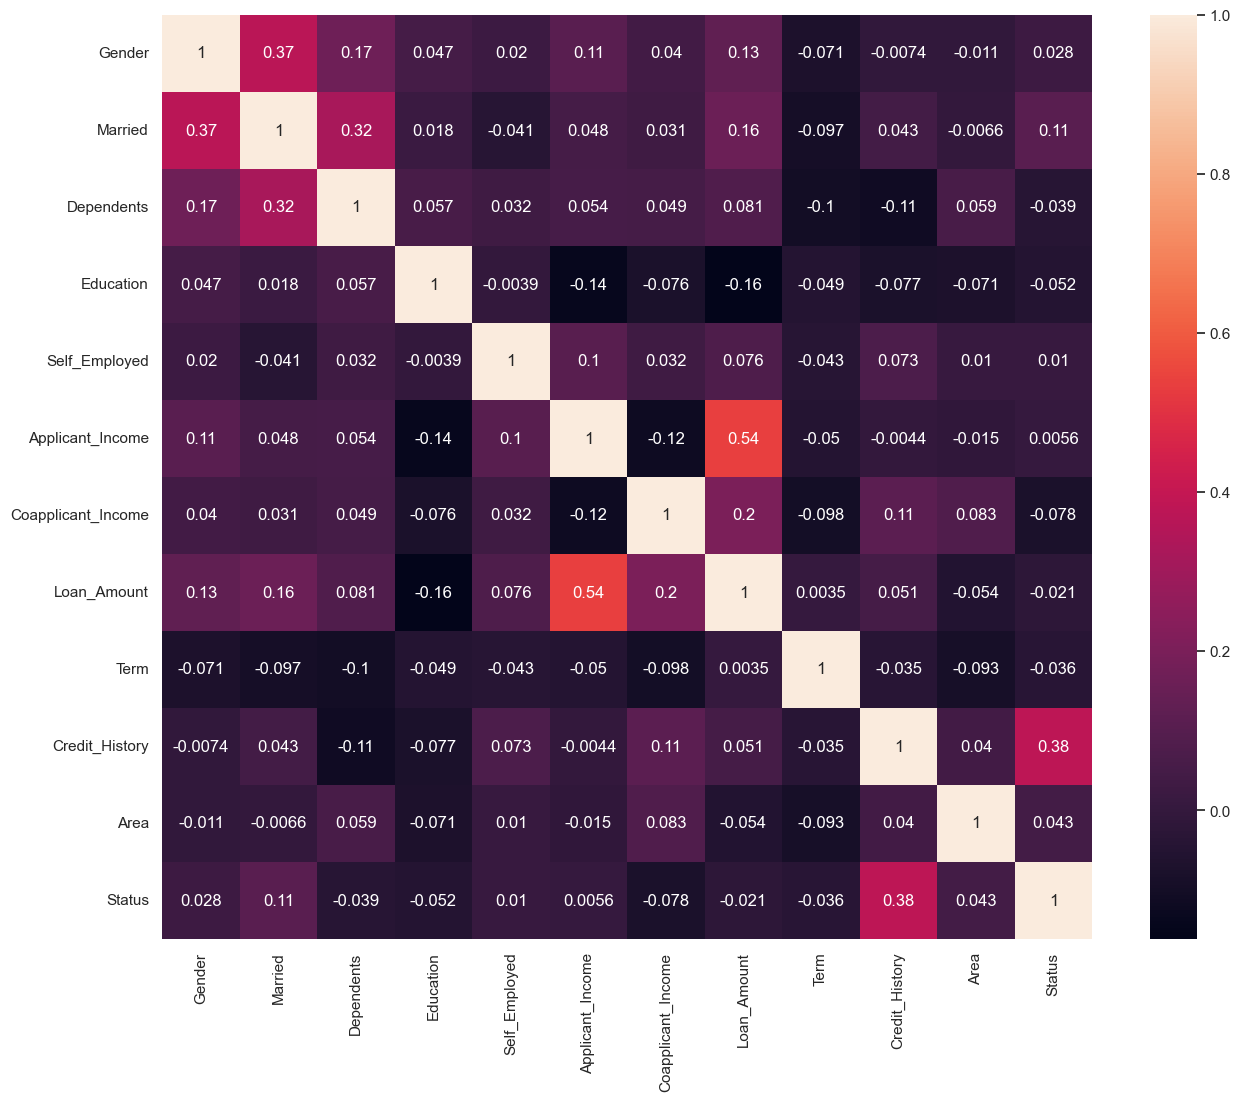

In [39]:
plt.figure(figsize = (15,12))
sns.heatmap(df_upsampled.corr(), fmt = '.2g', annot = True)

In [40]:
#Train tEST SPLIT
X = df_upsampled.drop('Status', axis =1)
y = df_upsampled['Status']

In [41]:
#Test size 20% and 80% Train
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test , y_train , y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

In [42]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,2,3,4]
}

#Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

#Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [44]:
dtree = DecisionTreeClassifier(random_state=0 , max_depth = 8, min_samples_leaf = 1, min_samples_split = 2)
dtree.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [45]:
y_pred = dtree.predict(X_test)
print("accuracy_score:", round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy_score: 72.78 %


In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score , log_loss
print('F1-Score:' ,(f1_score(y_test, y_pred, average='micro')))
print('Precison Score:' ,(precision_score(y_test, y_pred, average='micro')))
print('Recall score:' ,(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score:' ,(jaccard_score(y_test, y_pred, average='micro')))
print('Log loss:' ,(log_loss(y_test, y_pred)))

F1-Score: 0.7278106508875741
Precison Score: 0.727810650887574
Recall score: 0.727810650887574
Jaccard Score: 0.5720930232558139
Log loss: 9.810698555617687


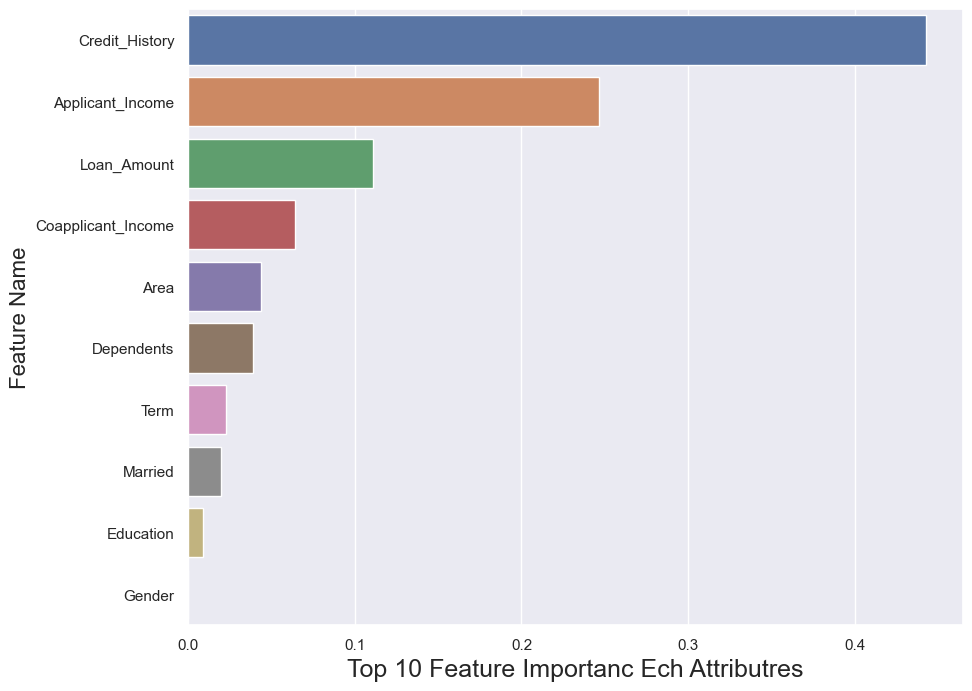

In [52]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name" : X_train.columns,
    "Importance" : dtree.feature_importances_
})
f1 = imp_df.sort_values(by = 'Importance', ascending=False)

f12 = f1.head(10)
plt.figure(figsize = (10,8))
sns.barplot(data=f12, x="Importance", y='Feature Name')
plt.xlabel('Top 10 Feature Importanc Ech Attributres', fontsize =18)
plt.ylabel('Feature Name', fontsize = 16)
plt.show()